### Dataframes in this notebook

* donations_df (original read of csv)
* donations (additional columns, converted cents to dollars, etc.)
* donations_13to17 (only donors who donated 2013-2017; removed other cohort) <-- PICKLE created
* cohort13, cohort14, cohort15, cohort16, cohort17 <-- PICKLES created
* cohort_stats <-- PICKLE created
* year1, year2, year3, year4, year5 <--PICKLES created
* donations2013, donations2014, donations2015, donations2016, donations2017



In [41]:
import numpy as np
import pandas as pd
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline

In [42]:
donations_df=pd.read_csv('../data/donation_export.csv')

In [43]:
donations_df.shape

(2024554, 92)

In [3]:
for col in donations_df.columns:
    print(col)

.id
.transactions.lapsed_total_amount
.transactions.recovered_total_amount
.transactions.lapsed_count
.transactions.recovered_count
.transactions.max_consecutive_giving_years
.transactions.total_giving_years
.transactions.amount_in_year.in.2013-01-01
.transactions.amount_in_year.in.2014-01-01
.transactions.amount_in_year.in.2015-01-01
.transactions.amount_in_year.in.2016-01-01
.transactions.amount_in_year.in.2017-01-01
.transactions.count_in_year.in.2013-01-01
.transactions.count_in_year.in.2014-01-01
.transactions.count_in_year.in.2015-01-01
.transactions.count_in_year.in.2016-01-01
.transactions.count_in_year.in.2017-01-01
.transactions.lapsed_amount_in_year.in.2013-01-01
.transactions.lapsed_amount_in_year.in.2014-01-01
.transactions.lapsed_amount_in_year.in.2015-01-01
.transactions.lapsed_amount_in_year.in.2016-01-01
.transactions.lapsed_amount_in_year.in.2017-01-01
.transactions.upgraded_amount_in_year.in.2013-01-01
.transactions.upgraded_amount_in_year.in.2014-01-01
.transactions

### 1. Data clean up / create master dataframe

In [4]:
# rename columns
donations_df.columns=[
"id",
"lapsed_amount",
"recovered_amount",
"lapsed_count",
"recovered_count",
"max_consec_giving_years",
"total_giving_years",
"amount_2013",
"amount_2014",
"amount_2015",
"amount_2016",
"amount_2017",
"count_2013",
"count_2014",
"count_2015",
"count_2016",
"count_2017",    
"lapsed_amount_2013",
"lapsed_amount_2014",
"lapsed_amount_2015",
"lapsed_amount_2016",
"lapsed_amount_2017",
"upgraded_amount_2013",
"upgraded_amount_2014",
"upgraded_amount_2015",
"upgraded_amount_2016",
"upgraded_amount_2017",
"downgraded_amount_2013",
"downgraded_amount_2014",
"downgraded_amount_2015",
"downgraded_amount_2016",
"downgraded_amount_2017",
"amount_01_2013",
"amount_02_2013",
"amount_03_2013",
"amount_04_2013",
"amount_05_2013",
"amount_06_2013",
"amount_07_2013",
"amount_08_2013",
"amount_09_2013",
"amount_10_2013",
"amount_11_2013",
"amount_12_2013",
"amount_01_2014",
"amount_02_2014",
"amount_03_2014",
"amount_04_2014",
"amount_05_2014",
"amount_06_2014",
"amount_07_2014",
"amount_08_2014",
"amount_09_2014",
"amount_10_2014",
"amount_11_2014",
"amount_12_2014",
"amount_01_2015",
"amount_02_2015",
"amount_03_2015",
"amount_04_2015",
"amount_05_2015",
"amount_06_2015",
"amount_07_2015",
"amount_08_2015",
"amount_09_2015",
"amount_10_2015",
"amount_11_2015",
"amount_12_2015",
"amount_01_2016",
"amount_02_2016",
"amount_03_2016",
"amount_04_2016",
"amount_05_2016",
"amount_06_2016",
"amount_07_2016",
"amount_08_2016",
"amount_09_2016",
"amount_10_2016",
"amount_11_2016",
"amount_12_2016",
"amount_01_2017",
"amount_02_2017",
"amount_03_2017",
"amount_04_2017",
"amount_05_2017",
"amount_06_2017",
"amount_07_2017",
"amount_08_2017",
"amount_09_2017",
"amount_10_2017",
"amount_11_2017",
"amount_12_2017"
]

In [5]:
donations_df.head()

,id,lapsed_amount,recovered_amount,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,amount_2013,amount_2014,amount_2015,...,amount_03_2017,amount_04_2017,amount_05_2017,amount_06_2017,amount_07_2017,amount_08_2017,amount_09_2017,amount_10_2017,amount_11_2017,amount_12_2017
0,1f4b5b6e68445c6c4a0509b3aca93f38,0,0,0,0,4,4,0,0,1821138,...,1929073,0,0,0,182290,134853,0,1327669,2615659,74954.0
1,4aaab6d244bf3599682239ed5591af8a,2500,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,0b0765dc9c759adc48a07688ba25e94e,4000,0,1,0,2,2,0,0,2000,...,0,0,0,0,0,0,0,0,0,NaN
3,377944ad61f72d800b25ec1862aec363,2500,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,6d5b22d39e68c656071a842732c63a0c,2500,10000,1,1,2,3,0,0,7000,...,0,0,0,0,0,0,0,0,0,NaN


In [6]:
#replace nans in Dec 2017 amount donated column with zeros.  **Need to confirm with Pete this is ok**
donations_df['amount_12_2017'] = donations_df['amount_12_2017'].fillna(0)

In [7]:
#create new dataframe with all "amount" columns to convert from cents to dollars
amount_columns = donations_df[[
'lapsed_amount',
'recovered_amount',
"amount_2013",
"amount_2014",
"amount_2015",
"amount_2016",
"amount_2017",
"lapsed_amount_2013",
"lapsed_amount_2014",
"lapsed_amount_2015",
"lapsed_amount_2016",
"lapsed_amount_2017",
"upgraded_amount_2013",
"upgraded_amount_2014",
"upgraded_amount_2015",
"upgraded_amount_2016",
"upgraded_amount_2017",
"downgraded_amount_2013",
"downgraded_amount_2014",
"downgraded_amount_2015",
"downgraded_amount_2016",
"downgraded_amount_2017",
"amount_01_2013",
"amount_02_2013",
"amount_03_2013",
"amount_04_2013",
"amount_05_2013",
"amount_06_2013",
"amount_07_2013",
"amount_08_2013",
"amount_09_2013",
"amount_10_2013",
"amount_11_2013",
"amount_12_2013",
"amount_01_2014",
"amount_02_2014",
"amount_03_2014",
"amount_04_2014",
"amount_05_2014",
"amount_06_2014",
"amount_07_2014",
"amount_08_2014",
"amount_09_2014",
"amount_10_2014",
"amount_11_2014",
"amount_12_2014",
"amount_01_2015",
"amount_02_2015",
"amount_03_2015",
"amount_04_2015",
"amount_05_2015",
"amount_06_2015",
"amount_07_2015",
"amount_08_2015",
"amount_09_2015",
"amount_10_2015",
"amount_11_2015",
"amount_12_2015",
"amount_01_2016",
"amount_02_2016",
"amount_03_2016",
"amount_04_2016",
"amount_05_2016",
"amount_06_2016",
"amount_07_2016",
"amount_08_2016",
"amount_09_2016",
"amount_10_2016",
"amount_11_2016",
"amount_12_2016",
"amount_01_2017",
"amount_02_2017",
"amount_03_2017",
"amount_04_2017",
"amount_05_2017",
"amount_06_2017",
"amount_07_2017",
"amount_08_2017",
"amount_09_2017",
"amount_10_2017",
"amount_11_2017",
"amount_12_2017"]].copy()

In [8]:
#create new dataframe with non-amount columns
non_amount_columns = donations_df[[
'id',
"lapsed_count",
"recovered_count",
"max_consec_giving_years",
"total_giving_years",
"count_2013",
"count_2014",
"count_2015",
"count_2016",
"count_2017"]].copy()

In [9]:
#convert cents to dollars in all "amount" columns
amount_columns=amount_columns/100

In [10]:
#merge amount and non_amount dataframes back into one
donations=non_amount_columns.merge(amount_columns, left_index=True, right_index=True)

In [11]:
#create new column "amount_total", which equals a donor's total donation amount 2013-2017
donations['amount_total']=donations['amount_2013'] + donations['amount_2014'] + donations['amount_2015'] + donations['amount_2016'] + donations['amount_2017']

In [12]:
#create new column "count_total", which equals a donor's total number of donations 2013-2017
donations['count_total']=donations['count_2013'] + donations['count_2014'] + donations['count_2015'] + donations['count_2016'] + donations['count_2017']

In [13]:
#create cohorts (determined by the year a donor first donated)
donations.loc[(donations['amount_2013'] > 0), 'cohort_yr'] = 'cohort13'  
donations.loc[(donations['amount_2013'] == 0) & (donations['amount_2014'] > 0), 'cohort_yr'] = 'cohort14'  
donations.loc[(donations['amount_2013'] == 0) & (donations['amount_2014'] == 0) & (donations['amount_2015'] > 0), 'cohort_yr'] = 'cohort15'
donations.loc[(donations['amount_2013'] == 0) & (donations['amount_2014'] == 0) & (donations['amount_2015'] == 0) & (donations['amount_2016'] > 0), 'cohort_yr'] = 'cohort16'
donations.loc[(donations['amount_2013'] == 0) & (donations['amount_2014'] == 0) & (donations['amount_2015'] == 0) & (donations['amount_2016'] == 0) & (donations['amount_2017'] > 0), 'cohort_yr'] = 'cohort17'
donations.loc[(donations['amount_2013'] == 0) & (donations['amount_2014'] == 0) & (donations['amount_2015'] == 0) & (donations['amount_2016'] == 0) & (donations['amount_2017'] == 0), 'cohort_yr'] = 'other'

In [14]:
#create new column "amount_y1", which is amount donated by donor the first year they donate
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_yr1'] = donations.amount_2013
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_yr1'] = donations.amount_2014
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_yr1'] = donations.amount_2015
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_yr1'] = donations.amount_2016
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_yr1'] = donations.amount_2017

In [15]:
#create new column "amount_y2", which is amount donated by donor the second year they donate
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_yr2'] = donations.amount_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_yr2'] = donations.amount_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_yr2'] = donations.amount_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_yr2'] = donations.amount_2017

In [16]:
#create new column "amount_y3", which is amount donated by donor the third year they donate
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_yr3'] = donations.amount_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_yr3'] = donations.amount_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_yr3'] = donations.amount_2017

In [17]:
#create new column "amount_y4", which is amount donated by donor the fourth year they donate
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_yr4'] = donations.amount_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_yr4'] = donations.amount_2017

In [18]:
#create new column "amount_yr5", which is amount donated by donor the fifth year they donate
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_yr5'] = donations.amount_2017

In [19]:
#reorder columns
donations = donations[[
'id',
'cohort_yr',
'amount_total',
'amount_yr1',
'amount_yr2',
'amount_yr3',
'amount_yr4',
'amount_yr5',
'amount_2013',
'amount_2014',
'amount_2015',
'amount_2016',
'amount_2017',
'total_giving_years',
'max_consec_giving_years',
'count_total',
'count_2013',
'count_2014',
'count_2015',
'count_2016',
'count_2017',
'recovered_count',
'recovered_amount',
'lapsed_count',
'lapsed_amount',
'lapsed_amount_2013',
'lapsed_amount_2014',
'lapsed_amount_2015',
'lapsed_amount_2016',
'lapsed_amount_2017',
'upgraded_amount_2013',
'upgraded_amount_2014',
'upgraded_amount_2015',
'upgraded_amount_2016',
'upgraded_amount_2017',
'downgraded_amount_2013',
'downgraded_amount_2014',
'downgraded_amount_2015',
'downgraded_amount_2016',
'downgraded_amount_2017',
'amount_01_2013',
'amount_02_2013',
'amount_03_2013',
'amount_04_2013',
'amount_05_2013',
'amount_06_2013',
'amount_07_2013',
'amount_08_2013',
'amount_09_2013',
'amount_10_2013',
'amount_11_2013',
'amount_12_2013',
'amount_01_2014',
'amount_02_2014',
'amount_03_2014',
'amount_04_2014',
'amount_05_2014',
'amount_06_2014',
'amount_07_2014',
'amount_08_2014',
'amount_09_2014',
'amount_10_2014',
'amount_11_2014',
'amount_12_2014',
'amount_01_2015',
'amount_02_2015',
'amount_03_2015',
'amount_04_2015',
'amount_05_2015',
'amount_06_2015',
'amount_07_2015',
'amount_08_2015',
'amount_09_2015',
'amount_10_2015',
'amount_11_2015',
'amount_12_2015',
'amount_01_2016',
'amount_02_2016',
'amount_03_2016',
'amount_04_2016',
'amount_05_2016',
'amount_06_2016',
'amount_07_2016',
'amount_08_2016',
'amount_09_2016',
'amount_10_2016',
'amount_11_2016',
'amount_12_2016',
'amount_01_2017',
'amount_02_2017',
'amount_03_2017',
'amount_04_2017',
'amount_05_2017',
'amount_06_2017',
'amount_07_2017',
'amount_08_2017',
'amount_09_2017',
'amount_10_2017',
'amount_11_2017',
'amount_12_2017'
]]

In [20]:
#create new column "count_yr1", which is # donations made by donor the first year they donate
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'count_yr1'] = donations.count_2013
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'count_yr1'] = donations.count_2014
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'count_yr1'] = donations.count_2015
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'count_yr1'] = donations.count_2016
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'count_yr1'] = donations.count_2017

In [21]:
#create new column "count_yr2", which is # donations made by donor the first year they donate
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'count_yr2'] = donations.count_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'count_yr2'] = donations.count_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'count_yr2'] = donations.count_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'count_yr2'] = donations.count_2017

In [22]:
#create new column "count_yr3", which is # donations made by donor the first year they donate
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'count_yr3'] = donations.count_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'count_yr3'] = donations.count_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'count_yr3'] = donations.count_2017

In [23]:
#create new column "count_yr4", which is # donations made by donor the first year they donate
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'count_yr4'] = donations.count_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'count_yr4'] = donations.count_2017

In [24]:
#create new column "count_yr5", which is # donations made by donor the first year they donate
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'count_yr5'] = donations.count_2017

In [25]:
#create columns for cohort13--amounts donated per month by donor year

donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_01_yr1'] = donations.amount_01_2013
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_02_yr1'] = donations.amount_02_2013
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_03_yr1'] = donations.amount_03_2013
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_04_yr1'] = donations.amount_04_2013
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_05_yr1'] = donations.amount_05_2013
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_06_yr1'] = donations.amount_06_2013
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_07_yr1'] = donations.amount_07_2013
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_08_yr1'] = donations.amount_08_2013
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_09_yr1'] = donations.amount_09_2013
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_10_yr1'] = donations.amount_10_2013
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_11_yr1'] = donations.amount_11_2013
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_12_yr1'] = donations.amount_12_2013
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_01_yr2'] = donations.amount_01_2014
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_02_yr2'] = donations.amount_02_2014
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_03_yr2'] = donations.amount_03_2014
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_04_yr2'] = donations.amount_04_2014
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_05_yr2'] = donations.amount_05_2014
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_06_yr2'] = donations.amount_06_2014
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_07_yr2'] = donations.amount_07_2014
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_08_yr2'] = donations.amount_08_2014
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_09_yr2'] = donations.amount_09_2014
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_10_yr2'] = donations.amount_10_2014
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_11_yr2'] = donations.amount_11_2014
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_12_yr2'] = donations.amount_12_2014
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_01_yr3'] = donations.amount_01_2015
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_02_yr3'] = donations.amount_02_2015
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_03_yr3'] = donations.amount_03_2015
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_04_yr3'] = donations.amount_04_2015
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_05_yr3'] = donations.amount_05_2015
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_06_yr3'] = donations.amount_06_2015
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_07_yr3'] = donations.amount_07_2015
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_08_yr3'] = donations.amount_08_2015
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_09_yr3'] = donations.amount_09_2015
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_10_yr3'] = donations.amount_10_2015
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_11_yr3'] = donations.amount_11_2015
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_12_yr3'] = donations.amount_12_2015
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_01_yr4'] = donations.amount_01_2016
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_02_yr4'] = donations.amount_02_2016
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_03_yr4'] = donations.amount_03_2016
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_04_yr4'] = donations.amount_04_2016
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_05_yr4'] = donations.amount_05_2016
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_06_yr4'] = donations.amount_06_2016
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_07_yr4'] = donations.amount_07_2016
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_08_yr4'] = donations.amount_08_2016
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_09_yr4'] = donations.amount_09_2016
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_10_yr4'] = donations.amount_10_2016
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_11_yr4'] = donations.amount_11_2016
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_12_yr4'] = donations.amount_12_2016
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_01_yr5'] = donations.amount_01_2017
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_02_yr5'] = donations.amount_02_2017
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_03_yr5'] = donations.amount_03_2017
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_04_yr5'] = donations.amount_04_2017
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_05_yr5'] = donations.amount_05_2017
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_06_yr5'] = donations.amount_06_2017
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_07_yr5'] = donations.amount_07_2017
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_08_yr5'] = donations.amount_08_2017
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_09_yr5'] = donations.amount_09_2017
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_10_yr5'] = donations.amount_10_2017
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_11_yr5'] = donations.amount_11_2017
donations.loc[(donations['cohort_yr'] == 'cohort13'), 'amount_12_yr5'] = donations.amount_12_2017

In [26]:
#create columns for cohort14--amounts donated per month by donor year

donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_01_yr1'] = donations.amount_01_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_02_yr1'] = donations.amount_02_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_03_yr1'] = donations.amount_03_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_04_yr1'] = donations.amount_04_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_05_yr1'] = donations.amount_05_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_06_yr1'] = donations.amount_06_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_07_yr1'] = donations.amount_07_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_08_yr1'] = donations.amount_08_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_09_yr1'] = donations.amount_09_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_10_yr1'] = donations.amount_10_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_11_yr1'] = donations.amount_11_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_12_yr1'] = donations.amount_12_2014
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_01_yr2'] = donations.amount_01_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_02_yr2'] = donations.amount_02_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_03_yr2'] = donations.amount_03_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_04_yr2'] = donations.amount_04_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_05_yr2'] = donations.amount_05_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_06_yr2'] = donations.amount_06_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_07_yr2'] = donations.amount_07_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_08_yr2'] = donations.amount_08_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_09_yr2'] = donations.amount_09_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_10_yr2'] = donations.amount_10_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_11_yr2'] = donations.amount_11_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_12_yr2'] = donations.amount_12_2015
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_01_yr3'] = donations.amount_01_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_02_yr3'] = donations.amount_02_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_03_yr3'] = donations.amount_03_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_04_yr3'] = donations.amount_04_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_05_yr3'] = donations.amount_05_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_06_yr3'] = donations.amount_06_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_07_yr3'] = donations.amount_07_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_08_yr3'] = donations.amount_08_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_09_yr3'] = donations.amount_09_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_10_yr3'] = donations.amount_10_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_11_yr3'] = donations.amount_11_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_12_yr3'] = donations.amount_12_2016
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_01_yr4'] = donations.amount_01_2017
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_02_yr4'] = donations.amount_02_2017
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_03_yr4'] = donations.amount_03_2017
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_04_yr4'] = donations.amount_04_2017
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_05_yr4'] = donations.amount_05_2017
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_06_yr4'] = donations.amount_06_2017
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_07_yr4'] = donations.amount_07_2017
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_08_yr4'] = donations.amount_08_2017
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_09_yr4'] = donations.amount_09_2017
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_10_yr4'] = donations.amount_10_2017
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_11_yr4'] = donations.amount_11_2017
donations.loc[(donations['cohort_yr'] == 'cohort14'), 'amount_12_yr4'] = donations.amount_12_2017

In [27]:
#create columns for cohort15--amounts donated per month by donor year

donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_01_yr1'] = donations.amount_01_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_02_yr1'] = donations.amount_02_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_03_yr1'] = donations.amount_03_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_04_yr1'] = donations.amount_04_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_05_yr1'] = donations.amount_05_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_06_yr1'] = donations.amount_06_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_07_yr1'] = donations.amount_07_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_08_yr1'] = donations.amount_08_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_09_yr1'] = donations.amount_09_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_10_yr1'] = donations.amount_10_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_11_yr1'] = donations.amount_11_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_12_yr1'] = donations.amount_12_2015
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_01_yr2'] = donations.amount_01_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_02_yr2'] = donations.amount_02_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_03_yr2'] = donations.amount_03_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_04_yr2'] = donations.amount_04_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_05_yr2'] = donations.amount_05_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_06_yr2'] = donations.amount_06_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_07_yr2'] = donations.amount_07_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_08_yr2'] = donations.amount_08_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_09_yr2'] = donations.amount_09_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_10_yr2'] = donations.amount_10_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_11_yr2'] = donations.amount_11_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_12_yr2'] = donations.amount_12_2016
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_01_yr3'] = donations.amount_01_2017
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_02_yr3'] = donations.amount_02_2017
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_03_yr3'] = donations.amount_03_2017
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_04_yr3'] = donations.amount_04_2017
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_05_yr3'] = donations.amount_05_2017
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_06_yr3'] = donations.amount_06_2017
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_07_yr3'] = donations.amount_07_2017
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_08_yr3'] = donations.amount_08_2017
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_09_yr3'] = donations.amount_09_2017
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_10_yr3'] = donations.amount_10_2017
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_11_yr3'] = donations.amount_11_2017
donations.loc[(donations['cohort_yr'] == 'cohort15'), 'amount_12_yr3'] = donations.amount_12_2017

In [28]:
#create columns for cohort16--amounts donated per month by donor year

donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_01_yr1'] = donations.amount_01_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_02_yr1'] = donations.amount_02_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_03_yr1'] = donations.amount_03_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_04_yr1'] = donations.amount_04_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_05_yr1'] = donations.amount_05_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_06_yr1'] = donations.amount_06_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_07_yr1'] = donations.amount_07_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_08_yr1'] = donations.amount_08_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_09_yr1'] = donations.amount_09_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_10_yr1'] = donations.amount_10_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_11_yr1'] = donations.amount_11_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_12_yr1'] = donations.amount_12_2016
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_01_yr2'] = donations.amount_01_2017
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_02_yr2'] = donations.amount_02_2017
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_03_yr2'] = donations.amount_03_2017
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_04_yr2'] = donations.amount_04_2017
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_05_yr2'] = donations.amount_05_2017
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_06_yr2'] = donations.amount_06_2017
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_07_yr2'] = donations.amount_07_2017
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_08_yr2'] = donations.amount_08_2017
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_09_yr2'] = donations.amount_09_2017
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_10_yr2'] = donations.amount_10_2017
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_11_yr2'] = donations.amount_11_2017
donations.loc[(donations['cohort_yr'] == 'cohort16'), 'amount_12_yr2'] = donations.amount_12_2017

In [29]:
#create columns for cohort17--amounts donated per month by donor year

donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_01_yr1'] = donations.amount_01_2017
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_02_yr1'] = donations.amount_02_2017
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_03_yr1'] = donations.amount_03_2017
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_04_yr1'] = donations.amount_04_2017
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_05_yr1'] = donations.amount_05_2017
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_06_yr1'] = donations.amount_06_2017
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_07_yr1'] = donations.amount_07_2017
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_08_yr1'] = donations.amount_08_2017
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_09_yr1'] = donations.amount_09_2017
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_10_yr1'] = donations.amount_10_2017
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_11_yr1'] = donations.amount_11_2017
donations.loc[(donations['cohort_yr'] == 'cohort17'), 'amount_12_yr1'] = donations.amount_12_2017

In [30]:
# print(donations.amount_01_yr2.sum())
# print(donations.amount_02_yr2.sum())
# print(donations.amount_03_yr2.sum())
# print(donations.amount_04_yr2.sum())
# print(donations.amount_05_yr2.sum())
# print(donations.amount_06_yr2.sum())
# print(donations.amount_07_yr2.sum())
# print(donations.amount_08_yr2.sum())
# print(donations.amount_09_yr2.sum())
# print(donations.amount_10_yr2.sum())
# print(donations.amount_11_yr2.sum())
# print(donations.amount_12_yr2.sum())

### 2. Create dataframe isolating donations made 2013-2017

In [31]:
# Remove "other" cohort (donors who did not make donation 2013-2017)
donations_13to17=donations.query('cohort_yr != "other"')

In [32]:
donations.groupby('cohort_yr').count()['id']

cohort_yr
cohort13    320102
cohort14    320675
cohort15    355141
cohort16    445598
cohort17    434994
other       148044
Name: id, dtype: int64

In [33]:
donations_13to17.groupby('cohort_yr').count()['id']

cohort_yr
cohort13    320102
cohort14    320675
cohort15    355141
cohort16    445598
cohort17    434994
Name: id, dtype: int64

In [34]:
y1=donations_13to17.amount_yr1 > 0
y2=donations_13to17.amount_yr2 > 0
y3=donations_13to17.amount_yr3 > 0
y4=donations_13to17.amount_yr4 > 0
y5=donations_13to17.amount_yr5 > 0

years_donated_df= pd.concat([y1,y2,y3,y4,y5], axis=1)

donations_13to17.loc[:,'years_donated']=years_donated_df.sum(axis=1)
donations_13to17.loc[:,'perc_years_donated']=years_donated_df.sum(axis=1)/years_donated_df.count(axis=1)

C:\Users\erinm\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\erinm\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [35]:
#donor_profile1: one-time vs repeat
donations_13to17.loc[(donations_13to17['years_donated'] == 1), 'donor_profile'] = 'one_time'
donations_13to17.loc[(donations_13to17['years_donated'] > 1), 'donor_profile'] = 'repeat'

In [36]:
donations_13to17.head()

,id,cohort_yr,amount_total,amount_yr1,amount_yr2,amount_yr3,amount_yr4,amount_yr5,amount_2013,amount_2014,...,amount_06_yr5,amount_07_yr5,amount_08_yr5,amount_09_yr5,amount_10_yr5,amount_11_yr5,amount_12_yr5,years_donated,perc_years_donated,donor_profile
0,1f4b5b6e68445c6c4a0509b3aca93f38,cohort15,120941.51,18211.38,40085.15,62644.98,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.6,repeat
1,4aaab6d244bf3599682239ed5591af8a,cohort16,25.00,25.00,0.00,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.2,one_time
2,0b0765dc9c759adc48a07688ba25e94e,cohort15,60.00,20.00,40.00,0.00,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.4,repeat
3,377944ad61f72d800b25ec1862aec363,cohort16,25.00,25.00,0.00,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.2,one_time
4,6d5b22d39e68c656071a842732c63a0c,cohort15,95.00,70.00,25.00,0.00,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.4,repeat


In [37]:
donations_13to17.shape

(1876510, 168)

#### Create sample dataset of donations_13to17

In [103]:
#created 7/30/20
#donations_13to17_sample=donations_13to17.sample(n=30000)

In [104]:
#donations_13to17_sample.head()

,id,cohort_yr,amount_total,amount_yr1,amount_yr2,amount_yr3,amount_yr4,amount_yr5,amount_2013,amount_2014,...,amount_07_yr5,amount_08_yr5,amount_09_yr5,amount_10_yr5,amount_11_yr5,amount_12_yr5,years_donated,perc_years_donated,donor_profile,consec_yrs
1437276,0943d06e0a2b50904b0ed463b72ec40a,cohort13,25.00,25.00,0.0,0.0,0.00,0.0,25.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0.2,one_time,NaN
1361731,12c3baeeb9cc8ad6890864394efea164,cohort14,200.00,100.00,100.0,0.0,0.00,NaN,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0.4,repeat,NaN
945552,710510328118aa966796d26f4ef9586c,cohort15,25.00,25.00,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0.2,one_time,NaN
1417042,7b955f5737ae04da8d415a34db1b64d0,cohort15,199.01,199.01,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0.2,one_time,NaN
847781,a298e3468dd9c42bacaf0f8bb40da036,cohort13,102.01,25.00,0.0,0.0,77.01,0.0,25.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0.4,repeat,NaN


In [115]:
# donations_13to17_sample1=donations_13to17_sample[['id', 'amount_01_2013', 
#                            'amount_02_2013',
#                            'amount_03_2013',
# 'amount_04_2013',
# 'amount_05_2013',
# 'amount_06_2013',
# 'amount_07_2013',
# 'amount_08_2013',
# 'amount_09_2013',
# 'amount_10_2013',
# 'amount_11_2013',
# 'amount_12_2013',
# 'amount_01_2014',
# 'amount_02_2014',
# 'amount_03_2014',
# 'amount_04_2014',
# 'amount_05_2014',
# 'amount_06_2014',
# 'amount_07_2014',
# 'amount_08_2014',
# 'amount_09_2014',
# 'amount_10_2014',
# 'amount_11_2014',
# 'amount_12_2014',
# 'amount_01_2015',
# 'amount_02_2015',
# 'amount_03_2015',
# 'amount_04_2015',
# 'amount_05_2015',
# 'amount_06_2015',
# 'amount_07_2015',
# 'amount_08_2015',
# 'amount_09_2015',
# 'amount_10_2015',
# 'amount_11_2015',
# 'amount_12_2015',
# 'amount_01_2016',
# 'amount_02_2016',
# 'amount_03_2016',
# 'amount_04_2016',
# 'amount_05_2016',
# 'amount_06_2016',
# 'amount_07_2016',
# 'amount_08_2016',
# 'amount_09_2016',
# 'amount_10_2016',
# 'amount_11_2016',
# 'amount_12_2016',
# 'amount_01_2017',
# 'amount_02_2017',
# 'amount_03_2017',
# 'amount_04_2017',
# 'amount_05_2017',
# 'amount_06_2017',
# 'amount_07_2017',
# 'amount_08_2017',
# 'amount_09_2017',
# 'amount_10_2017',
# 'amount_11_2017',
# 'amount_12_2017'
# ]].copy()

In [116]:
#donations_13to17_sample1.shape

(30000, 61)

In [117]:
# donations_13to17_sample1.columns

Index(['id', 'amount_01_2013', 'amount_02_2013', 'amount_03_2013',
       'amount_04_2013', 'amount_05_2013', 'amount_06_2013', 'amount_07_2013',
       'amount_08_2013', 'amount_09_2013', 'amount_10_2013', 'amount_11_2013',
       'amount_12_2013', 'amount_01_2014', 'amount_02_2014', 'amount_03_2014',
       'amount_04_2014', 'amount_05_2014', 'amount_06_2014', 'amount_07_2014',
       'amount_08_2014', 'amount_09_2014', 'amount_10_2014', 'amount_11_2014',
       'amount_12_2014', 'amount_01_2015', 'amount_02_2015', 'amount_03_2015',
       'amount_04_2015', 'amount_05_2015', 'amount_06_2015', 'amount_07_2015',
       'amount_08_2015', 'amount_09_2015', 'amount_10_2015', 'amount_11_2015',
       'amount_12_2015', 'amount_01_2016', 'amount_02_2016', 'amount_03_2016',
       'amount_04_2016', 'amount_05_2016', 'amount_06_2016', 'amount_07_2016',
       'amount_08_2016', 'amount_09_2016', 'amount_10_2016', 'amount_11_2016',
       'amount_12_2016', 'amount_01_2017', 'amount_02_2017', 'am

In [119]:
# donations_13to17_sample1.columns = ['id','01-01-2013',
# '02-01-2013',
# '03-01-2013',
# '04-01-2013',
# '05-01-2013',
# '06-01-2013',
# '07-01-2013',
# '08-01-2013',
# '09-01-2013',
# '10-01-2013',
# '11-01-2013',
# '12-01-2013',
# '01-01-2014',
# '02-01-2014',
# '03-01-2014',
# '04-01-2014',
# '05-01-2014',
# '06-01-2014',
# '07-01-2014',
# '08-01-2014',
# '09-01-2014',
# '10-01-2014',
# '11-01-2014',
# '12-01-2014',
# '01-01-2015',
# '02-01-2015',
# '03-01-2015',
# '04-01-2015',
# '05-01-2015',
# '06-01-2015',
# '07-01-2015',
# '08-01-2015',
# '09-01-2015',
# '10-01-2015',
# '11-01-2015',
# '12-01-2015',
# '01-01-2016',
# '02-01-2016',
# '03-01-2016',
# '04-01-2016',
# '05-01-2016',
# '06-01-2016',
# '07-01-2016',
# '08-01-2016',
# '09-01-2016',
# '10-01-2016',
# '11-01-2016',
# '12-01-2016',
# '01-01-2017',
# '02-01-2017',
# '03-01-2017',
# '04-01-2017',
# '05-01-2017',
# '06-01-2017',
# '07-01-2017',
# '08-01-2017',
# '09-01-2017',
# '10-01-2017',
# '11-01-2017',
# '12-01-2017'
# ]

In [120]:
# melted_sample=pd.melt(donations_13to17_sample1, id_vars =['id'], value_vars =['01-01-2013',
# '02-01-2013',
# '03-01-2013',
# '04-01-2013',
# '05-01-2013',
# '06-01-2013',
# '07-01-2013',
# '08-01-2013',
# '09-01-2013',
# '10-01-2013',
# '11-01-2013',
# '12-01-2013',
# '01-01-2014',
# '02-01-2014',
# '03-01-2014',
# '04-01-2014',
# '05-01-2014',
# '06-01-2014',
# '07-01-2014',
# '08-01-2014',
# '09-01-2014',
# '10-01-2014',
# '11-01-2014',
# '12-01-2014',
# '01-01-2015',
# '02-01-2015',
# '03-01-2015',
# '04-01-2015',
# '05-01-2015',
# '06-01-2015',
# '07-01-2015',
# '08-01-2015',
# '09-01-2015',
# '10-01-2015',
# '11-01-2015',
# '12-01-2015',
# '01-01-2016',
# '02-01-2016',
# '03-01-2016',
# '04-01-2016',
# '05-01-2016',
# '06-01-2016',
# '07-01-2016',
# '08-01-2016',
# '09-01-2016',
# '10-01-2016',
# '11-01-2016',
# '12-01-2016',
# '01-01-2017',
# '02-01-2017',
# '03-01-2017',
# '04-01-2017',
# '05-01-2017',
# '06-01-2017',
# '07-01-2017',
# '08-01-2017',
# '09-01-2017',
# '10-01-2017',
# '11-01-2017',
# '12-01-2017',
# ], var_name='date', value_name='amount') 

In [121]:
# melted_sample.shape

(1800000, 3)

In [123]:
# melted_sample.query('amount > 0').count()['id']

45105

In [124]:
# melted_sample1=melted_sample.query('amount > 0')

In [126]:
# melted_sample1.shape

(45105, 3)

In [127]:
# melted_sample1.to_csv('fft_sample.csv')

In [94]:
donations_13to17.loc[(donations_13to17['amount_2016'] > 0) & (donations_13to17['amount_2017'] > 0), 'consec_yrs'] = 'consec_prevYR'

In [38]:
donations_13to17.head()

,id,cohort_yr,amount_total,amount_yr1,amount_yr2,amount_yr3,amount_yr4,amount_yr5,amount_2013,amount_2014,...,amount_06_yr5,amount_07_yr5,amount_08_yr5,amount_09_yr5,amount_10_yr5,amount_11_yr5,amount_12_yr5,years_donated,perc_years_donated,donor_profile
0,1f4b5b6e68445c6c4a0509b3aca93f38,cohort15,120941.51,18211.38,40085.15,62644.98,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.6,repeat
1,4aaab6d244bf3599682239ed5591af8a,cohort16,25.00,25.00,0.00,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.2,one_time
2,0b0765dc9c759adc48a07688ba25e94e,cohort15,60.00,20.00,40.00,0.00,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.4,repeat
3,377944ad61f72d800b25ec1862aec363,cohort16,25.00,25.00,0.00,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.2,one_time
4,6d5b22d39e68c656071a842732c63a0c,cohort15,95.00,70.00,25.00,0.00,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.4,repeat


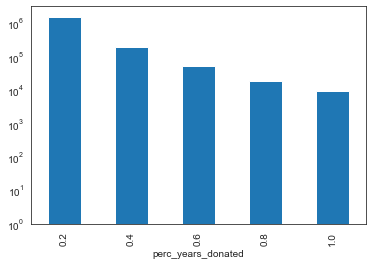

In [39]:
donations_13to17.groupby('perc_years_donated').count()['id'].plot(kind='bar', log=True);

In [40]:
donations_13to17.to_pickle('donations_13to17.pkl')

### 3. Create cohort dataframes (based on first year donated)

In [97]:
#divide into cohorts
other = donations.query("cohort_yr == 'other'").reindex()
cohort13 = donations_13to17.query("cohort_yr == 'cohort13'").reindex()
cohort14 = donations_13to17.query("cohort_yr == 'cohort14'").reindex()
cohort15 = donations_13to17.query("cohort_yr == 'cohort15'").reindex()
cohort16 = donations_13to17.query("cohort_yr == 'cohort16'").reindex()
cohort17 = donations_13to17.query("cohort_yr == 'cohort17'").reindex()

In [98]:
print(other.shape)
print(cohort13.shape)
print(cohort14.shape)
print(cohort15.shape)
print(cohort16.shape)
print(cohort17.shape)

(148044, 165)
(320102, 169)
(320675, 169)
(355141, 169)
(445598, 169)
(434994, 169)


In [99]:
cohort13.to_pickle('cohort13.pkl')
cohort14.to_pickle('cohort14.pkl')
cohort15.to_pickle('cohort15.pkl')
cohort16.to_pickle('cohort16.pkl')
cohort17.to_pickle('cohort17.pkl')

### 4. Create cohort_stats dataframe

In [38]:
# stats by cohort YEAR 1

# number of donors per cohort class in their first year
no_cohort_donors_13_y1 = cohort13['id'].count() 
no_cohort_donors_14_y1 = cohort14['id'].count() 
no_cohort_donors_15_y1 = cohort15['id'].count() 
no_cohort_donors_16_y1 = cohort16['id'].count() 
no_cohort_donors_17_y1 = cohort17['id'].count() 

# number of donations cohort class made in their first year
no_cohort13_donations_y1 = cohort13['count_2013'].sum() 
no_cohort14_donations_y1 = cohort14['count_2014'].sum()  
no_cohort15_donations_y1 = cohort15['count_2015'].sum() 
no_cohort16_donations_y1 = cohort16['count_2016'].sum() 
no_cohort17_donations_y1 = cohort17['count_2017'].sum() 

# $ amount of donations cohort class made in their first year
amt_cohort13_donations_y1 = cohort13['amount_2013'].sum() 
amt_cohort14_donations_y1 = cohort14['amount_2014'].sum()  
amt_cohort15_donations_y1 = cohort15['amount_2015'].sum() 
amt_cohort16_donations_y1 = cohort16['amount_2016'].sum() 
amt_cohort17_donations_y1 = cohort17['amount_2017'].sum() 

In [39]:
# stats by cohort YEAR 2

# number of donors per cohort class in their second year
no_cohort_donors_13_y2 = cohort13.query('amount_2014 > 0').count()['id'] 
no_cohort_donors_14_y2 = cohort14.query('amount_2015 > 0').count()['id'] 
no_cohort_donors_15_y2 = cohort15.query('amount_2016 > 0').count()['id']
no_cohort_donors_16_y2 = cohort16.query('amount_2017 > 0').count()['id']

# number of donations cohort class made in their second year
no_cohort13_donations_y2 = cohort13['count_2014'].sum() 
no_cohort14_donations_y2 = cohort14['count_2015'].sum()  
no_cohort15_donations_y2 = cohort15['count_2016'].sum() 
no_cohort16_donations_y2 = cohort16['count_2017'].sum() 

# $ amount of donations cohort class made in their second year
amt_cohort13_donations_y2 = cohort13['amount_2014'].sum() 
amt_cohort14_donations_y2 = cohort14['amount_2015'].sum()  
amt_cohort15_donations_y2 = cohort15['amount_2016'].sum() 
amt_cohort16_donations_y2 = cohort16['amount_2017'].sum() 

In [40]:
# stats by cohort YEAR 3

# number of donors per cohort class in their third year
no_cohort_donors_13_y3 = cohort13.query('amount_2015 > 0').count()['id'] 
no_cohort_donors_14_y3 = cohort14.query('amount_2016 > 0').count() ['id']
no_cohort_donors_15_y3 = cohort15.query('amount_2017 > 0').count()['id']

# number of donations cohort class made in their third year
no_cohort13_donations_y3 = cohort13['count_2015'].sum() 
no_cohort14_donations_y3 = cohort14['count_2016'].sum()  
no_cohort15_donations_y3 = cohort15['count_2017'].sum() 

# $ amount of donations cohort class made in their third year
amt_cohort13_donations_y3 = cohort13['amount_2015'].sum() 
amt_cohort14_donations_y3 = cohort14['amount_2016'].sum()  
amt_cohort15_donations_y3 = cohort15['amount_2017'].sum() 

In [41]:
# stats by cohort YEAR 4

# number of donors per cohort class in their fourth year
no_cohort_donors_13_y4 = cohort13.query('amount_2016 > 0').count()['id'] 
no_cohort_donors_14_y4 = cohort14.query('amount_2017 > 0').count()['id'] 

# number of donations cohort class made in their fourth year
no_cohort13_donations_y4 = cohort13['count_2016'].sum() 
no_cohort14_donations_y4 = cohort14['count_2017'].sum()  

# $ amount of donations cohort class made in their fourth year
amt_cohort13_donations_y4 = cohort13['amount_2016'].sum() 
amt_cohort14_donations_y4 = cohort14['amount_2017'].sum()  

In [42]:
# stats by cohort YEAR 5

# number of donors per cohort class in their fifth year
no_cohort_donors_13_y5 = cohort13.query('amount_2017 > 0').count()['id'] 

# number of donations cohort class made in their fifth year
no_cohort13_donations_y5 = cohort13['count_2017'].sum() 

# $ amount of donations cohort class made in their fifth year
amt_cohort13_donations_y5 = cohort13['amount_2017'].sum() 

In [ ]:
# print(f'cohort13 --->')
# print(no_cohort_donors_13_y1)
# print(no_cohort_donors_13_y2)
# print(no_cohort_donors_13_y3)
# print(no_cohort_donors_13_y4)
# print(no_cohort_donors_13_y5)

# print(no_cohort13_donations_y1)
# print(no_cohort13_donations_y2)
# print(no_cohort13_donations_y3)
# print(no_cohort13_donations_y4)
# print(no_cohort13_donations_y5)

# print(amt_cohort13_donations_y1)
# print(amt_cohort13_donations_y2)
# print(amt_cohort13_donations_y3)
# print(amt_cohort13_donations_y4)
# print(amt_cohort13_donations_y5)

# print(f'cohort14 --->')
# print(no_cohort_donors_14_y1)
# print(no_cohort_donors_14_y2)
# print(no_cohort_donors_14_y3)
# print(no_cohort_donors_14_y4)

# print(no_cohort14_donations_y1)
# print(no_cohort14_donations_y2)
# print(no_cohort14_donations_y3)
# print(no_cohort14_donations_y4)

# print(amt_cohort14_donations_y1)
# print(amt_cohort14_donations_y2)
# print(amt_cohort14_donations_y3)
# print(amt_cohort14_donations_y4)

# print(f'cohort15 --->')
# print(no_cohort_donors_15_y1)
# print(no_cohort_donors_15_y2)
# print(no_cohort_donors_15_y3)

# print(no_cohort15_donations_y1)
# print(no_cohort15_donations_y2)
# print(no_cohort15_donations_y3)

# print(amt_cohort15_donations_y1)
# print(amt_cohort15_donations_y2)
# print(amt_cohort15_donations_y3)

# print(f'cohort16 --->')
# print(no_cohort_donors_16_y1)
# print(no_cohort_donors_16_y2)

# print(no_cohort16_donations_y1)
# print(no_cohort16_donations_y2)

# print(amt_cohort16_donations_y1)
# print(amt_cohort16_donations_y2)

# print(f'cohort17 --->')
# print(no_cohort_donors_17_y1)

# print(no_cohort17_donations_y1)

# print(amt_cohort17_donations_y1)

In [ ]:
# print(f'yr 1 --->')
# print(no_cohort13_donations_y1)
# print(no_cohort14_donations_y1)
# print(no_cohort15_donations_y1)
# print(no_cohort16_donations_y1)
# print(no_cohort17_donations_y1)

# print(f'yr 2 --->')
# print(no_cohort13_donations_y2)
# print(no_cohort14_donations_y2)
# print(no_cohort15_donations_y2)
# print(no_cohort16_donations_y2)

# print(f'yr 3 --->')
# print(no_cohort13_donations_y3)
# print(no_cohort14_donations_y3)
# print(no_cohort15_donations_y3)

# print(f'yr 4 --->')
# print(no_cohort13_donations_y4)
# print(no_cohort14_donations_y4)

# print(f'yr 5 --->')
# print(no_cohort13_donations_y5)

In [43]:
cohort_stats={'year':[2013, 2014, 2015, 2016, 2017],
              'no_cohort_donors_y1':[no_cohort_donors_13_y1, no_cohort_donors_14_y1, no_cohort_donors_15_y1, no_cohort_donors_16_y1, no_cohort_donors_17_y1],
              'no_donations_y1':[no_cohort13_donations_y1, no_cohort14_donations_y1, no_cohort15_donations_y1, no_cohort16_donations_y1, no_cohort17_donations_y1],
              'amt_donated_y1':[amt_cohort13_donations_y1, amt_cohort14_donations_y1, amt_cohort15_donations_y1, amt_cohort16_donations_y1, amt_cohort17_donations_y1],
              'no_cohort_donors_y2':[no_cohort_donors_13_y2, no_cohort_donors_14_y2, no_cohort_donors_15_y2, no_cohort_donors_16_y2, np.nan],
              'no_donations_y2':[no_cohort13_donations_y2, no_cohort14_donations_y2, no_cohort15_donations_y2, no_cohort16_donations_y2, np.nan],
              'amt_donated_y2':[amt_cohort13_donations_y2, amt_cohort14_donations_y2, amt_cohort15_donations_y2, amt_cohort16_donations_y2, np.nan],
              'no_cohort_donors_y3':[no_cohort_donors_13_y3, no_cohort_donors_14_y3, no_cohort_donors_15_y3, np.nan, np.nan],
              'no_donations_y3':[no_cohort13_donations_y3, no_cohort14_donations_y3, no_cohort15_donations_y3, np.nan, np.nan],
              'amt_donated_y3':[amt_cohort13_donations_y3, amt_cohort14_donations_y3, amt_cohort15_donations_y3, np.nan, np.nan],
              'no_cohort_donors_y4':[no_cohort_donors_13_y4, no_cohort_donors_14_y4, np.nan, np.nan, np.nan],
              'no_donations_yr4':[no_cohort13_donations_y4, no_cohort14_donations_y4, np.nan, np.nan, np.nan],
              'amt_donated_y4':[amt_cohort13_donations_y4, amt_cohort14_donations_y4, np.nan, np.nan, np.nan],
              'no_cohort_donors_y5':[no_cohort_donors_13_y5, np.nan, np.nan, np.nan, np.nan],
              'no_donations_y5':[no_cohort13_donations_y5, np.nan, np.nan, np.nan, np.nan],
              'amt_donated_y5':[amt_cohort13_donations_y5, np.nan, np.nan, np.nan, np.nan]
             }
cohort_stats=pd.DataFrame(cohort_stats)

In [44]:
cohort_stats

,year,no_cohort_donors_y1,no_donations_y1,amt_donated_y1,no_cohort_donors_y2,no_donations_y2,amt_donated_y2,no_cohort_donors_y3,no_donations_y3,amt_donated_y3,no_cohort_donors_y4,no_donations_yr4,amt_donated_y4,no_cohort_donors_y5,no_donations_y5,amt_donated_y5
0,2013,320102,573983,30428184.74,62142.0,285259.0,15286871.11,42240.0,184148.0,12595399.86,32642.0,152544.0,11403685.98,26933.0,160109.0,11159399.13
1,2014,320675,461349,26174346.80,48667.0,131028.0,7745897.26,31525.0,89558.0,6437708.77,24290.0,86127.0,5818855.02,NaN,NaN,NaN
2,2015,355141,468186,30147004.32,46078.0,112446.0,8280549.87,31844.0,98312.0,7444163.63,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,445598,602717,36530214.52,56538.0,177433.0,10475760.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,434994,668561,37973855.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
cohort_stats.head()

,year,no_cohort_donors_y1,no_donations_y1,amt_donated_y1,no_cohort_donors_y2,no_donations_y2,amt_donated_y2,no_cohort_donors_y3,no_donations_y3,amt_donated_y3,no_cohort_donors_y4,no_donations_yr4,amt_donated_y4,no_cohort_donors_y5,no_donations_y5,amt_donated_y5
0,2013,320102,573983,30428184.74,62142.0,285259.0,15286871.11,42240.0,184148.0,12595399.86,32642.0,152544.0,11403685.98,26933.0,160109.0,11159399.13
1,2014,320675,461349,26174346.80,48667.0,131028.0,7745897.26,31525.0,89558.0,6437708.77,24290.0,86127.0,5818855.02,NaN,NaN,NaN
2,2015,355141,468186,30147004.32,46078.0,112446.0,8280549.87,31844.0,98312.0,7444163.63,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,445598,602717,36530214.52,56538.0,177433.0,10475760.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,434994,668561,37973855.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
cohort_stats.to_pickle('cohort_stats.pkl')

### 5. Create giving year dataframes (yr1, yr2, etc.)

In [47]:
# create year 1 dataframe
year1 = donations_13to17[['id', 'cohort_yr', 'amount_yr1', 'count_yr1', 'amount_01_yr1', 'amount_02_yr1', 'amount_03_yr1', 'amount_04_yr1', 'amount_05_yr1', 'amount_06_yr1', 'amount_07_yr1', 'amount_08_yr1', 'amount_09_yr1', 'amount_10_yr1', 'amount_11_yr1', 'amount_12_yr1']].copy()

In [48]:
#rename columns
year1.columns=['id', 'cohort_yr', 'amount', 'count', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']

In [49]:
# create year 2 dataframe
year2 = donations_13to17[['id', 'cohort_yr', 'amount_yr2', 'count_yr2', 'amount_01_yr2', 'amount_02_yr2', 'amount_03_yr2', 'amount_04_yr2', 'amount_05_yr2', 'amount_06_yr2', 'amount_07_yr2', 'amount_08_yr2', 'amount_09_yr2', 'amount_10_yr2', 'amount_11_yr2', 'amount_12_yr2']].copy()

In [50]:
#rename columns
year2.columns=['id', 'cohort_yr', 'amount', 'count', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']

In [51]:
# create year 3 dataframe
year3 = donations_13to17[['id', 'cohort_yr', 'amount_yr3', 'count_yr3', 'amount_01_yr3', 'amount_02_yr3', 'amount_03_yr3', 'amount_04_yr3', 'amount_05_yr3', 'amount_06_yr3', 'amount_07_yr3', 'amount_08_yr3', 'amount_09_yr3', 'amount_10_yr3', 'amount_11_yr3', 'amount_12_yr3']].copy()

In [52]:
#rename columns
year3.columns=['id', 'cohort_yr', 'amount', 'count', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']

In [53]:
# create year 4 dataframe
year4 = donations_13to17[['id', 'cohort_yr', 'amount_yr4', 'count_yr4', 'amount_01_yr4', 'amount_02_yr4', 'amount_03_yr4', 'amount_04_yr4', 'amount_05_yr4', 'amount_06_yr4', 'amount_07_yr4', 'amount_08_yr4', 'amount_09_yr4', 'amount_10_yr4', 'amount_11_yr4', 'amount_12_yr4']].copy()

In [54]:
#rename columns
year4.columns=['id', 'cohort_yr', 'amount', 'count', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']

In [55]:
# create year 5 dataframe
year5 = donations_13to17[['id', 'cohort_yr', 'amount_yr5', 'count_yr5', 'amount_01_yr5', 'amount_02_yr5', 'amount_03_yr5', 'amount_04_yr5', 'amount_05_yr5', 'amount_06_yr5', 'amount_07_yr5', 'amount_08_yr5', 'amount_09_yr5', 'amount_10_yr5', 'amount_11_yr5', 'amount_12_yr5']].copy()

In [56]:
#rename columns
year5.columns=['id', 'cohort_yr', 'amount', 'count', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']

In [57]:
year1.to_pickle('year1.pkl')
year2.to_pickle('year2.pkl')
year3.to_pickle('year3.pkl')
year4.to_pickle('year4.pkl')
year5.to_pickle('year5.pkl')

In [58]:
year1.head()

,id,cohort_yr,amount,count,jan,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec
0,1f4b5b6e68445c6c4a0509b3aca93f38,cohort15,18211.38,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2400.0,200.0,15611.38
1,4aaab6d244bf3599682239ed5591af8a,cohort16,25.00,1.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0b0765dc9c759adc48a07688ba25e94e,cohort15,20.00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.00
3,377944ad61f72d800b25ec1862aec363,cohort16,25.00,1.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,6d5b22d39e68c656071a842732c63a0c,cohort15,70.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.00


### 6. Create yearly_stats dataframe PICK UP HERE

In [ ]:
yearly_stats={'year':[2013, 2014, 2015, 2016, 2017],
              'no_donors':[no_donors_13, no_donors_14, no_donors_15, no_donors_16, no_donors_17],
              'no_new_donors':[no_new_donors_13, no_new_donors_14, no_new_donors_15, no_new_donors_16, no_new_donors_17],
              'no_repeat_donors':[no_repeat_donors_13, no_repeat_donors_14, no_repeat_donors_15, no_repeat_donors_16, no_repeat_donors_17],
              'no_donors_lapsed':[np.nan, no_donors_lapsed_14, no_donors_lapsed_15, no_donors_lapsed_16, no_donors_lapsed_17],
              'retention_rate':[np.nan, retention_rate_14, retention_rate_15, retention_rate_16, retention_rate_17],
              'amt_donated':[amt_donated_13, amt_donated_14, amt_donated_15, amt_donated_16, amt_donated_17],
              'no_donations':[no_donations_13, no_donations_14, no_donations_15, no_donations_16, no_donations_17],
              'avg_amt_per_donor':[avg_amt_per_donor_13, avg_amt_per_donor_14, avg_amt_per_donor_15, avg_amt_per_donor_16, avg_amt_per_donor_17],
              'max_amt_by_single_donor':[max_amt_by_single_donor_13, max_amt_by_single_donor_14, max_amt_by_single_donor_15, max_amt_by_single_donor_16, max_amt_by_single_donor_17]
             }
cohort_stats=pd.DataFrame(cohort_stats)

In [ ]:
#info on largest donor overall
donations[donations['amount_total'] == donations['amount_total'].max()]
# or donations.loc[donations['amount_total'].idxmax()]

In [ ]:
plt.hist('count_2017', data=cohort17, log=True);

In [ ]:
#cohort stats
data=cohort13
y1_donor_count=data.query('amount_first_year > 0').count()['amount_first_year']
y2_donor_count=data.query('amount_second_year > 0').count()['amount_second_year']
y3_donor_count=data.query('amount_third_year > 0').count()['amount_third_year']
y4_donor_count=data.query('amount_fourth_year > 0').count()['amount_fourth_year']
y5_donor_count=data.query('amount_fifth_year > 0').count()['amount_fifth_year']

y1_donations_dollars=data.amount_first_year.sum()/100
y2_donations_dollars=data.amount_second_year.sum()/100
y3_donations_dollars=data.amount_third_year.sum()/100
y4_donations_dollars=data.amount_fourth_year.sum()/100
y5_donations_dollars=data.amount_fifth_year.sum()/100

y1_donations_count=data.count_first_year.sum()
y2_donations_count=data.count_second_year.sum()
y3_donations_count=data.count_third_year.sum()
y4_donations_count=data.count_fourth_year.sum()
y5_donations_count=data.count_fifth_year.sum()

print(f'*first year data*')
print(f'cohort size:', y1_donor_count)
print(f'total $ donated:', y1_donations_dollars)
print(f'total # donations:', y1_donations_count)
print(f'average # donations per donor:', y1_donations_count/y1_donor_count)
print(f'average $ donated per donor', y1_donations_dollars/y1_donor_count)
print(f'max donation:',data.amount_first_year.max()/100)

print(f'*second year data*')
print(f'cohort size:', y2_donor_count)
print(f'total $ donated:', y2_donations_dollars)
print(f'total # donations:', y2_donations_count)
print(f'average # donations per donor:', y2_donations_count/y2_donor_count)
print(f'average $ donated per donor', y2_donations_dollars/y2_donor_count)
print(f'max donation:',data.amount_second_year.max()/100)

In [ ]:
#cohort stats
data=cohort13
print(f'first year data')
print(f'cohort size:', data.id.count())
print(f'total $ donated in first year:', data.amount_first_year.sum())
print(f'total # donations in first year', data.amount_second_year.sum())
print(f'average # donations per donor in first year:', data.count_first_year.sum()/data.id.count())
print(f'average $ donated per donor in first year', data.amount_first_year.sum()/data.id.count())